In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [ ]:
# AI WAS USED FOR GENERATING THE MATPLOTLIB CODE!

In [3]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

In [4]:
baseline = pd.read_csv('baseline.csv')
baseline.columns

Index(['Step', 'td3_self_play_5M_linear_pool - eval/win_rate/StrongBot',
       'td3_self_play_5M_linear_pool - eval/win_rate/StrongBot__MIN',
       'td3_self_play_5M_linear_pool - eval/win_rate/StrongBot__MAX',
       'td3_self_play_5M_linear_pool - eval/win_rate/WeakBot',
       'td3_self_play_5M_linear_pool - eval/win_rate/WeakBot__MIN',
       'td3_self_play_5M_linear_pool - eval/win_rate/WeakBot__MAX'],
      dtype='object')

In [5]:
layernorm = pd.read_csv('layernorm.csv')
layernorm.columns

Index(['Step',
       'td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/StrongBot',
       'td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/StrongBot__MIN',
       'td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/StrongBot__MAX',
       'td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/WeakBot',
       'td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/WeakBot__MIN',
       'td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/WeakBot__MAX'],
      dtype='object')

In [7]:
base_weak   = baseline['td3_self_play_5M_linear_pool - eval/win_rate/WeakBot'].values
base_strong = baseline['td3_self_play_5M_linear_pool - eval/win_rate/StrongBot'].values
ln_weak     = layernorm['td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/WeakBot'].values[:len(base_weak)]
lnstrong    = layernorm['td3_self_play_layer_norm_linear_pool_10M - eval/win_rate/StrongBot'].values[:len(base_weak)]

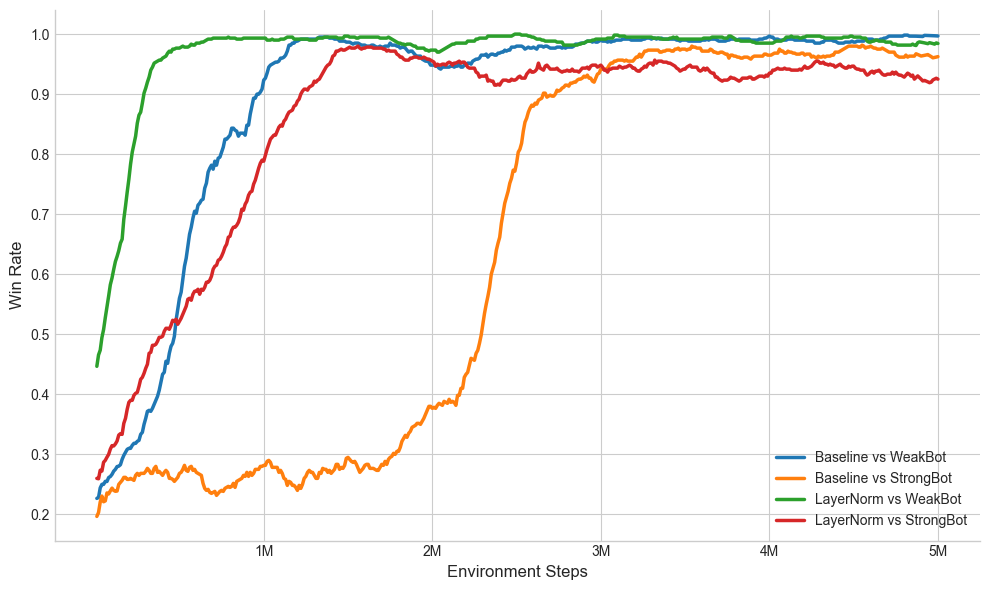

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# ---- Optional smoothing (moving average) ----
def smooth(y, window=20):
    if window <= 1:
        return y
    return np.convolve(y, np.ones(window)/window, mode='same')

import pandas as pd

def smooth(y, window=30):
    return (
        pd.Series(y)
        .rolling(window=window, center=True, min_periods=1)
        .mean()
        .values
    )

# Smooth curves (adjust window if needed)
base_weak_s   = smooth(base_weak, 30)
base_strong_s = smooth(base_strong, 30)
ln_weak_s     = smooth(ln_weak, 30)
ln_strong_s   = smooth(lnstrong, 30)

x = baseline['Step'].values

# ---- Styling ----
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines
ax.plot(x, base_weak_s,   label="Baseline vs WeakBot",   linewidth=2.5)
ax.plot(x, base_strong_s, label="Baseline vs StrongBot", linewidth=2.5)
ax.plot(x, ln_weak_s,     label="LayerNorm vs WeakBot",  linewidth=2.5)
ax.plot(x, ln_strong_s,   label="LayerNorm vs StrongBot",linewidth=2.5)

# ---- Format x-axis as Millions ----
def millions_formatter(x, pos):
    return f"{int(x/1e6)}M"

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set ticks explicitly at 1M intervals
ax.set_xticks(np.linspace(1e6, 5e6, 5))

# Labels and title
ax.set_xlabel("Environment Steps", fontsize=12)
ax.set_ylabel("Win Rate", fontsize=12)
# ax.set_title("TD3 Self-Play Performance", fontsize=14, weight='bold')

# Clean up spines (W&B style)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend styling
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

In [36]:
layernorm_draw_rate = pd.read_csv('layernorm_drawrate.csv')
print(layernorm_draw_rate.columns)

Index(['Step',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/CustomOpponent',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/CustomOpponent__MIN',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/CustomOpponent__MAX',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/StrongBot',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/StrongBot__MIN',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/StrongBot__MAX',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/WeakBot',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/WeakBot__MIN',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/WeakBot__MAX',
       ...
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/self_play_t_440000__MAX',
       'td3_self_play_layer_norm_linear_pool_10M - eval/draw_rate/self_play_t_4400000',
       'td3_self_play_layer_norm_linear_pool_10M - ev

In [43]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

df = layernorm_draw_rate.copy()

# Keep only self_play columns (ignore MIN/MAX)
self_play_cols = [
    c for c in df.columns
    if "self_play_t" in c and "__" not in c
]

# Sort them by timestep number inside the name
def extract_step(col):
    match = re.search(r"self_play_t_(\d+)", col)
    return int(match.group(1)) if match else 0

self_play_cols = sorted(self_play_cols, key=extract_step)

x = df["Step"].values[:len(base_weak)]

C:\Users\rajin\AppData\Local\Temp\ipykernel_20232\1488063128.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(opponent_cmaps[i % len(opponent_cmaps)])


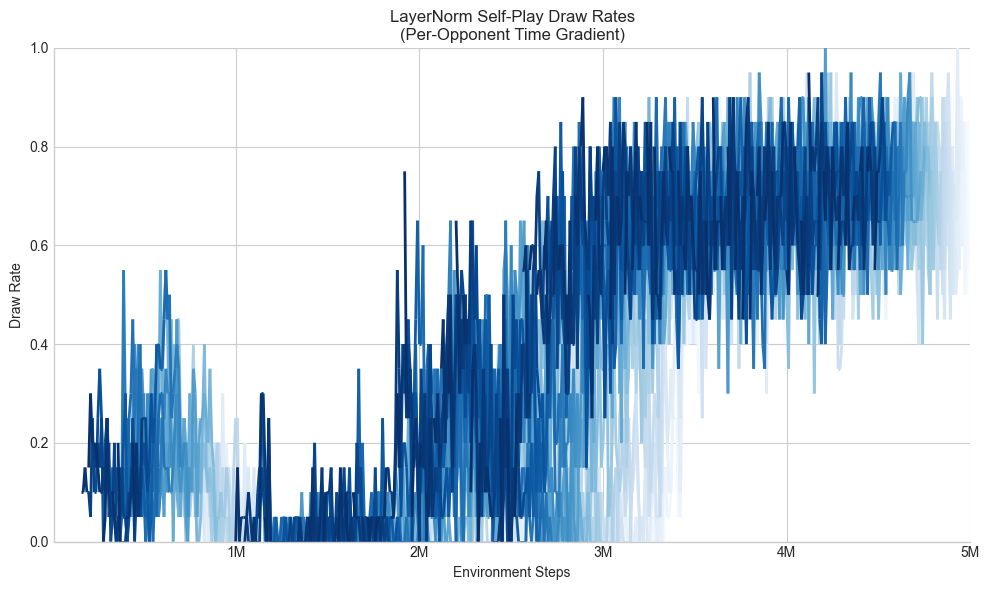

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.ticker import FuncFormatter
from matplotlib import cm

plt.close('all')  # <-- add this

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Each opponent gets its own colormap (dark to light)
opponent_cmaps = [
    "Blues",# "Reds", "Greens", "Purples", "Oranges",
    # "YlOrBr", "PuRd", "GnBu", "BuPu", "OrRd"
]

for i, col in enumerate(self_play_cols):
    # col = self_play_cols[20]
    y = df[col].values[:len(base_weak)]
    x_local = x[:len(y)]

    mask = ~np.isnan(y)
    x_valid = x_local[mask]
    y_valid = y[mask]

    if len(x_valid) < 2:
        continue

    # Normalize time within this opponent only (0 = dark, 1 = light)
    t_norm = 1 - (x_valid - x_valid.min()) / (x_valid.max() - x_valid.min())
    # print(t_norm)

    points = np.array([x_valid, y_valid]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    cmap = cm.get_cmap(opponent_cmaps[i % len(opponent_cmaps)])
    # Use 0.4 to 1.0 range so we avoid colors that are too light/washed out
    norm = plt.Normalize(0.8, 1.0)

    lc = LineCollection(segments, cmap=cmap)
    lc.set_array(t_norm[:-1])
    lc.set_linewidth(2)
    lc.set_label(col)

    ax.add_collection(lc)
    # break

    # Add a dot at the start and end for clarity
    # ax.plot(x_valid[0],  y_valid[0],  'o', color=cmap(0.4), markersize=5)
    # ax.plot(x_valid[-1], y_valid[-1], 'o', color=cmap(1.0), markersize=5)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 1)

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax.set_xlabel("Environment Steps")
ax.set_ylabel("Draw Rate")
ax.set_title("LayerNorm Self-Play Draw Rates\n(Per-Opponent Time Gradient)")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(loc="upper left", fontsize=8)

plt.tight_layout()
plt.show()

In [13]:
two_step   = pd.read_csv('2_step_return.csv')
three_step = pd.read_csv('3_step_return.csv')
five_step  = pd.read_csv('5_step_return.csv')

five_step.head()

,Step,td3_self_play_rollout_5_mirroring_15M - eval/win_rate/StrongBot,td3_self_play_rollout_5_mirroring_15M - eval/win_rate/StrongBot__MIN,td3_self_play_rollout_5_mirroring_15M - eval/win_rate/StrongBot__MAX,td3_self_play_rollout_5_mirroring_15M - eval/win_rate/WeakBot,td3_self_play_rollout_5_mirroring_15M - eval/win_rate/WeakBot__MIN,td3_self_play_rollout_5_mirroring_15M - eval/win_rate/WeakBot__MAX
0,20000,0.25,0.25,0.25,0.30,0.30,0.30
1,40000,0.15,0.15,0.15,0.15,0.15,0.15
2,60000,0.30,0.30,0.30,0.15,0.15,0.15
3,80000,0.15,0.15,0.15,0.45,0.45,0.45
4,100000,0.40,0.40,0.40,0.55,0.55,0.55


In [14]:
two_step_weak       = two_step['td3_rollout_2_mirroring_2M - eval/win_rate/WeakBot'].values
two_step_strong     = two_step['td3_rollout_2_mirroring_2M - eval/win_rate/StrongBot'].values
maxL = len(two_step_weak)
base_weak           = baseline['td3_self_play_5M_linear_pool - eval/win_rate/WeakBot'].values[:maxL]
base_strong         = baseline['td3_self_play_5M_linear_pool - eval/win_rate/StrongBot'].values[:maxL]
three_step_weak     = three_step['td3_self_play_rollout_mirroring_10M - eval/win_rate/WeakBot'].values[:maxL]
three_step_strong   = three_step['td3_self_play_rollout_mirroring_10M - eval/win_rate/StrongBot'].values[:maxL]
five_step_weak      = five_step['td3_self_play_rollout_5_mirroring_15M - eval/win_rate/WeakBot'].values[:maxL]
five_step_strong    = five_step['td3_self_play_rollout_5_mirroring_15M - eval/win_rate/StrongBot'].values[:maxL]
len(five_step_weak)

100

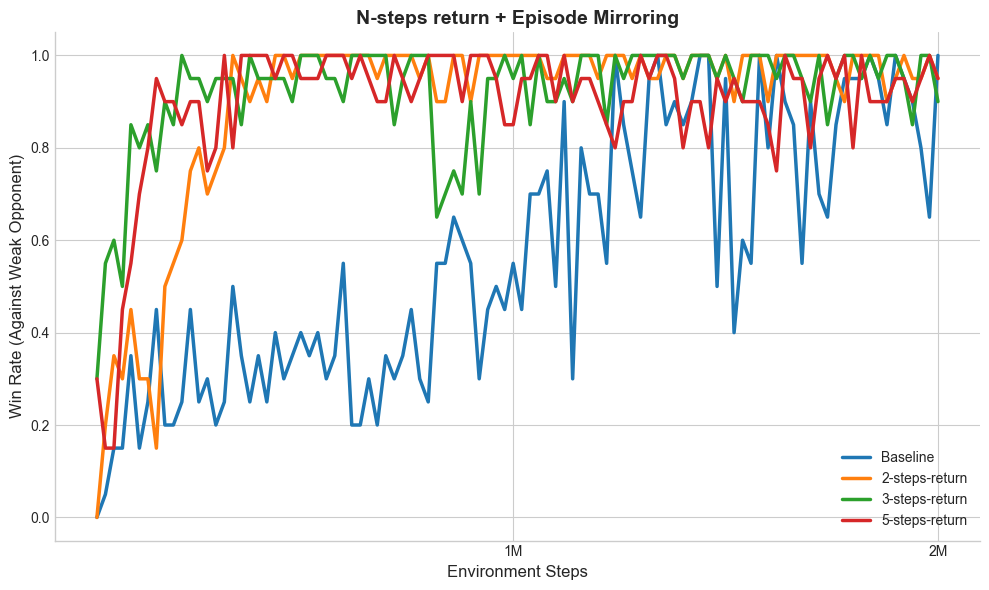

In [172]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# ---- Optional smoothing (moving average) ----
def smooth(y, window=20):
    if window <= 1:
        return y
    return np.convolve(y, np.ones(window)/window, mode='same')

import pandas as pd

def smooth(y, window=30):
    return (
        pd.Series(y)
        .rolling(window=window, center=True, min_periods=1)
        .mean()
        .values
    )

# Smooth curves (adjust window if needed)
base_weak_s   = smooth(base_weak, 5)
base_strong_s = smooth(base_strong, 5)
two_step_weak_s = smooth(two_step_weak, 5)
two_step_strong_s = smooth(two_step_strong, 5)
three_step_weak_s = smooth(three_step_weak, 5)
three_step_strong_s = smooth(three_step_strong, 5)
five_step_weak_s = smooth(five_step_weak, 5)
five_step_strong_s = smooth(five_step_strong, 5)

x = two_step['Step'].values

# ---- Styling ----
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines
ax.plot(x, base_weak,   label="Baseline",   linewidth=2.5)
ax.plot(x, two_step_weak, label="2-steps-return", linewidth=2.5)
ax.plot(x, three_step_weak, label="3-steps-return", linewidth=2.5)
ax.plot(x, five_step_weak, label="5-steps-return", linewidth=2.5)

# ---- Format x-axis as Millions ----
def millions_formatter(x, pos):
    return f"{int(x/1e6)}M"

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set ticks explicitly at 1M intervals
ax.set_xticks(np.linspace(1e6, 2e6, 2))

# Labels and title
ax.set_xlabel("Environment Steps", fontsize=12)
ax.set_ylabel("Win Rate (Against Weak Opponent)", fontsize=12)
ax.set_title("N-steps return + Episode Mirroring", fontsize=14, weight='bold')

# Clean up spines (W&B style)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend styling
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

In [10]:
rnd  = pd.read_csv('rnd.csv')
pink = pd.read_csv('pink_noise.csv')
pink.head()

,Step,td3_self_play_pink_rollout_5_mirroring_10M - eval/win_rate/StrongBot,td3_self_play_pink_rollout_5_mirroring_10M - eval/win_rate/StrongBot__MIN,td3_self_play_pink_rollout_5_mirroring_10M - eval/win_rate/StrongBot__MAX,td3_self_play_pink_rollout_5_mirroring_10M - eval/win_rate/WeakBot,td3_self_play_pink_rollout_5_mirroring_10M - eval/win_rate/WeakBot__MIN,td3_self_play_pink_rollout_5_mirroring_10M - eval/win_rate/WeakBot__MAX
0,20000,0.10,0.10,0.10,0.00,0.00,0.00
1,40000,0.10,0.10,0.10,0.30,0.30,0.30
2,60000,0.15,0.15,0.15,0.55,0.55,0.55
3,80000,0.35,0.35,0.35,0.35,0.35,0.35
4,100000,0.40,0.40,0.40,0.55,0.55,0.55


In [15]:
base_weak           = baseline['td3_self_play_5M_linear_pool - eval/win_rate/WeakBot'].values
rnd_weak            = rnd['td3_rnd_gaussian_rollout_3_mirroring_10M - eval/win_rate/WeakBot'].values
pink_weak           = pink['td3_self_play_pink_rollout_5_mirroring_10M - eval/win_rate/WeakBot'].values
three_step_weak     = three_step['td3_self_play_rollout_mirroring_10M - eval/win_rate/WeakBot'].values

print(len(base_weak), len(rnd_weak), len(pink_weak))


500 500 500


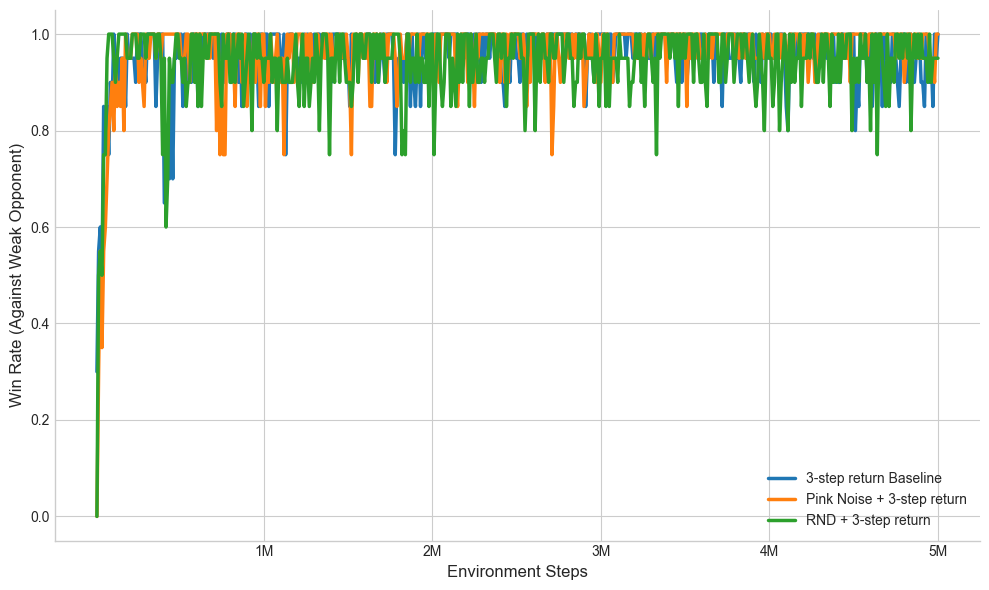

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# ---- Optional smoothing (moving average) ----
def smooth(y, window=20):
    if window <= 1:
        return y
    return np.convolve(y, np.ones(window)/window, mode='same')

import pandas as pd

def smooth(y, window=30):
    return (
        pd.Series(y)
        .rolling(window=window, center=True, min_periods=1)
        .mean()
        .values
    )

# Smooth curves (adjust window if needed)
base_weak_s   = smooth(base_weak, 5)
pink_weak_s   = smooth(pink_weak, 5)
rnd_weak_s    = smooth(rnd_weak, 5)

x = baseline['Step'].values

# ---- Styling ----
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines
ax.plot(x, three_step_weak,   label="3-step return Baseline",   linewidth=2.5)
ax.plot(x, pink_weak, label="Pink Noise + 3-step return", linewidth=2.5)
ax.plot(x, rnd_weak, label="RND + 3-step return", linewidth=2.5)

# ---- Format x-axis as Millions ----
def millions_formatter(x, pos):
    return f"{int(x/1e6)}M"

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set ticks explicitly at 1M intervals
ax.set_xticks(np.linspace(1e6, 5e6, 5))

# Labels and title
ax.set_xlabel("Environment Steps", fontsize=12)
ax.set_ylabel("Win Rate (Against Weak Opponent)", fontsize=12)
# ax.set_title("N-steps return + Episode Mirroring", fontsize=14, weight='bold')

# Clean up spines (W&B style)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend styling
ax.legend(frameon=False)

plt.tight_layout()
plt.show()